Nosso problema é analizar dados de uso de bicicleta a apartir de varias informações, nos temos "três" variaveis para prever:
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

    sendo que a ultima é a soma das duas anteriores

Nos podemos ajustar dois modelos ou apenas um, temos os dados do clima por dia e por hora, o que dá para ajustar dosi modelos se quisermos.

juro que nunca vi um dado mais bem tratado do que esse, simplesmente LINDOOO

In [6]:
import os

import pandas               as pd 
import numpy                as np 
import seaborn              as sns 
import matplotlib.pyplot    as plt

In [13]:
# vou  fazer a primeira analize do dado

file_path = os.path.dirname(os.getcwd())

day     = pd.read_csv(file_path + r'\Dados\day.csv', index_col='instant')
hour    = pd.read_csv(file_path + r'\Dados\hour.csv', index_col='instant')

hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
print(hour.isnull().values.any(),
day.isnull().values.any())

print(hour.isna().values.any(),
day.isna().values.any())

#não tem dados vazios

False False
False False


In [31]:
#vou jundar a coluna da hora e data e fazer uma nova coluna, DT_HR
hour['dteday'] =  pd.to_datetime(hour['dteday'], format="%Y-%m-%d")
day['dteday'] =  pd.to_datetime(day['dteday'], format="%Y-%m-%d")

hour['DT_HR'] = hour['dteday'] + pd.to_timedelta(hour['hr'], unit='h')

In [45]:
day['casual_moving_avg'] = day['casual'].rolling(window=15).mean()
day['registered_moving_avg'] = day['registered'].rolling(window=15).mean()
day['cnt_moving_avg'] = day['cnt'].rolling(window=15).mean()

<Axes: xlabel='dteday', ylabel='casual'>

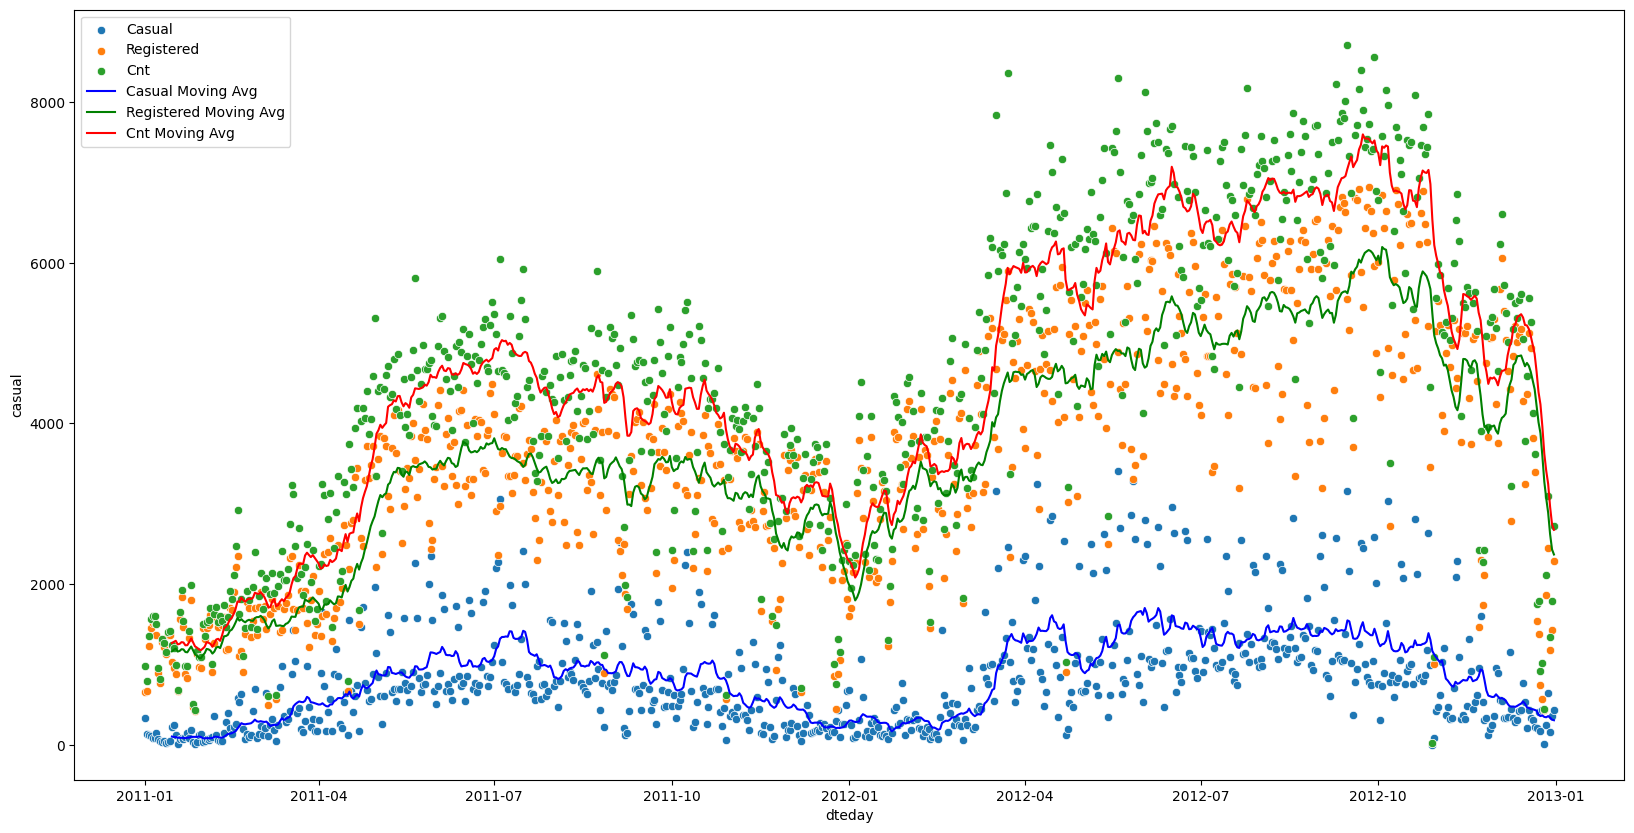

In [51]:
plt.figure(figsize=(20, 10))

sns.scatterplot(data=day, x='dteday', y='casual', label='Casual', marker='o')
sns.scatterplot(data=day, x='dteday', y='registered', label='Registered', marker='o')
sns.scatterplot(data=day, x='dteday', y='cnt', label='Cnt', marker='o')

sns.lineplot(data=day, x='dteday', y='casual_moving_avg', label='Casual Moving Avg', color='blue', linestyle='-')
sns.lineplot(data=day, x='dteday', y='registered_moving_avg', label='Registered Moving Avg', color='green', linestyle='-')
sns.lineplot(data=day, x='dteday', y='cnt_moving_avg', label='Cnt Moving Avg', color='red', linestyle='-')


Text(0, 0.5, 'Valores')

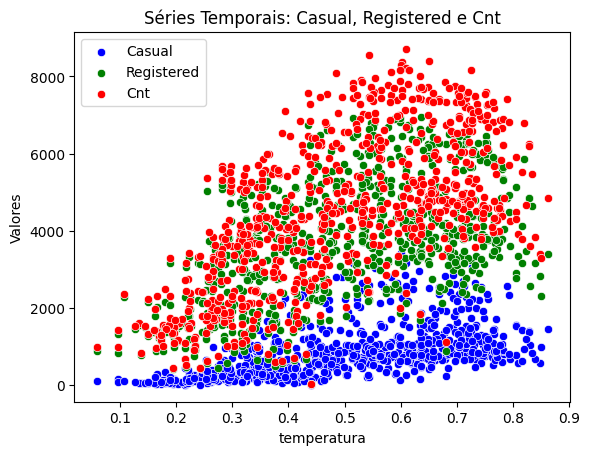

In [52]:
sns.scatterplot(data=day, x='temp', y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=day, x='temp', y='registered', label='Registered', marker='o', color='green')
sns.scatterplot(data=day, x='temp', y='cnt', label='Cnt', marker='o', color='red')

# Adicionando título e rótulos aos eixos
plt.title('Séries Temporais: Casual, Registered e Cnt')
plt.xlabel('temperatura')
plt.ylabel('Valores')


Text(0, 0.5, 'Valores')

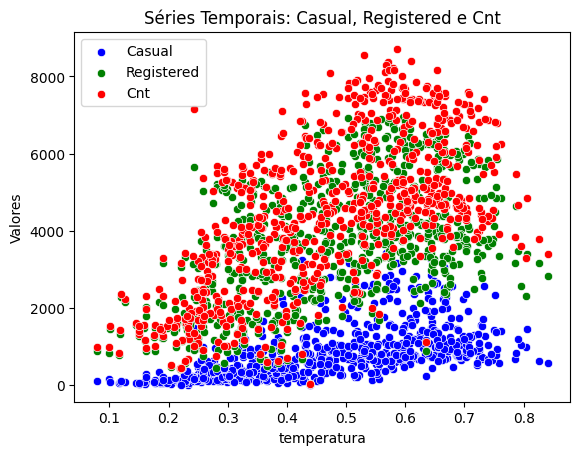

In [53]:
sns.scatterplot(data=day, x='atemp', y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=day, x='atemp', y='registered', label='Registered', marker='o', color='green')
sns.scatterplot(data=day, x='atemp', y='cnt', label='Cnt', marker='o', color='red')

# Adicionando título e rótulos aos eixos
plt.title('Séries Temporais: Casual, Registered e Cnt')
plt.xlabel('temperatura')
plt.ylabel('Valores')


<Axes: xlabel='atemp', ylabel='temp'>

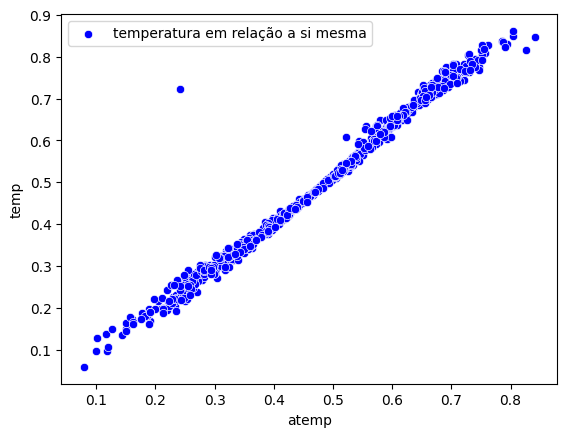

In [ ]:
sns.scatterplot(data=day, x='atemp', y='temp', label='temperatura em relação a si mesma', marker='o', color='blue')
#dados extremamente correlacionados, pode tirar um

<Axes: xlabel='hum', ylabel='temp'>

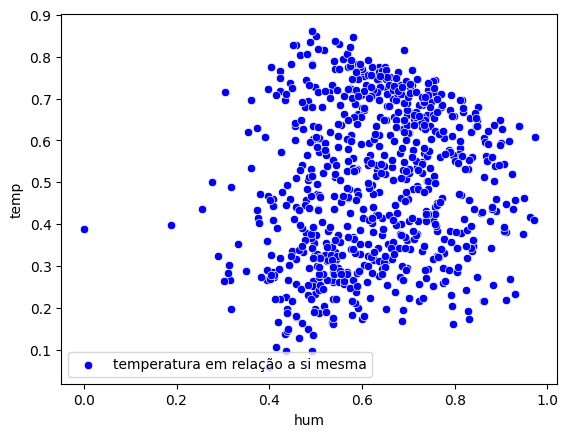

In [54]:
sns.scatterplot(data=day, x='hum', y='temp', label='temperatura em relação a si mesma', marker='o', color='blue')

<Axes: xlabel='hum', ylabel='casual'>

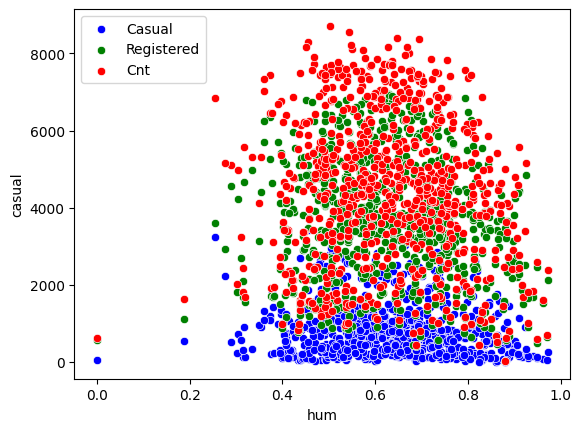

In [60]:
sns.scatterplot(data=day, x='hum', y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=day, x='hum', y='registered', label='Registered', marker='o', color='green')
sns.scatterplot(data=day, x='hum', y='cnt', label='Cnt', marker='o', color='red')

<Axes: xlabel='registered', ylabel='casual'>

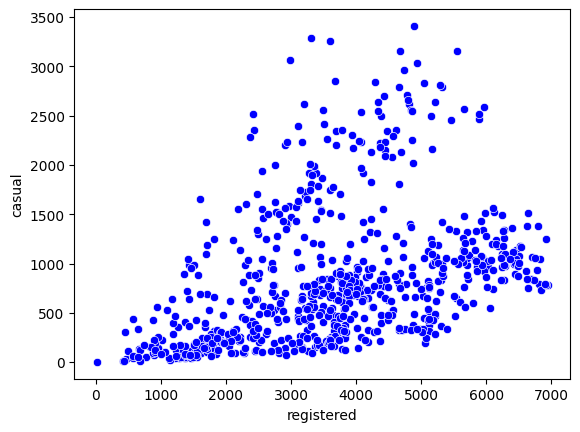

In [61]:
sns.scatterplot(data=day, x='registered', y='casual', marker='o', color='blue')

<Axes: xlabel='windspeed', ylabel='casual'>

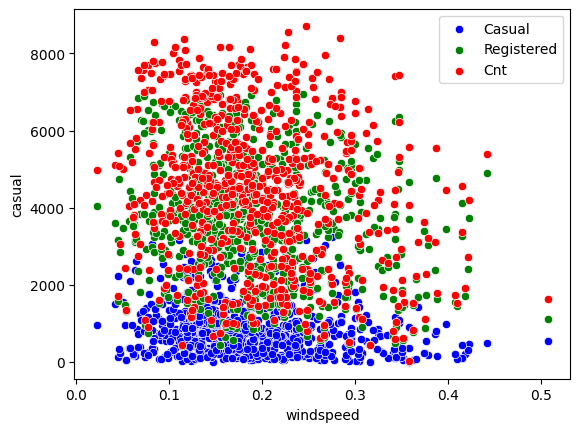

In [62]:
sns.scatterplot(data=day, x='windspeed', y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=day, x='windspeed', y='registered', label='Registered', marker='o', color='green')
sns.scatterplot(data=day, x='windspeed', y='cnt', label='Cnt', marker='o', color='red')

<Axes: xlabel='windspeed', ylabel='hum'>

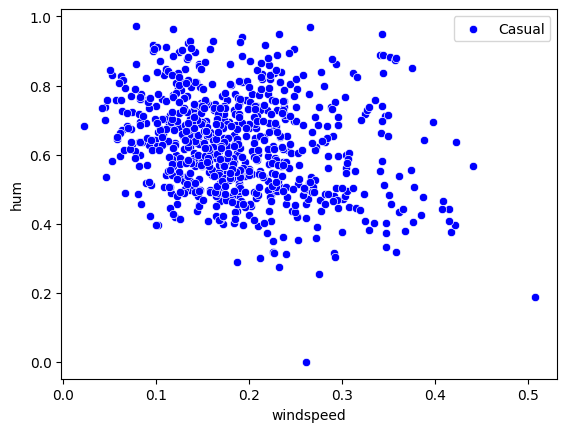

In [63]:
sns.scatterplot(data=day, x='windspeed', y='hum', label='Casual', marker='o', color='blue')

<Axes: xlabel='windspeed', ylabel='temp'>

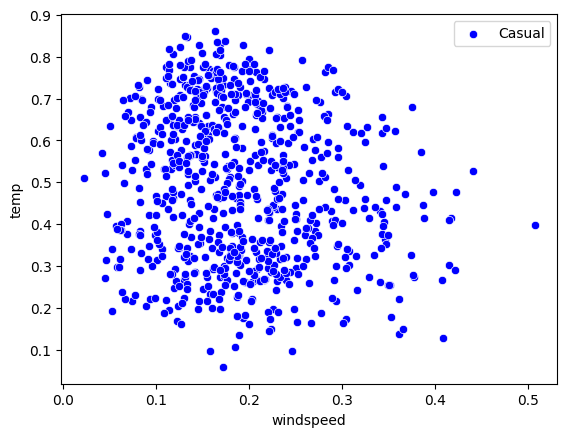

In [64]:
sns.scatterplot(data=day, x='windspeed', y='temp', label='Casual', marker='o', color='blue')

In [65]:
weekly_data = day.resample('W').sum()

# Plotando o gráfico agrupado por semana
plt.figure(figsize=(10, 6))

# Plotando os pontos originais (scatterplot)
sns.scatterplot(data=weekly_data, x=weekly_data.index, y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=weekly_data, x=weekly_data.index, y='registered', label='Registered', marker='o', color='green')
sns.scatterplot(data=weekly_data, x=weekly_data.index, y='cnt', label='Cnt', marker='o', color='red')

# Adicionando título e rótulos aos eixos
plt.title('Séries Temporais Semanais: Casual, Registered e Cnt')
plt.xlabel('Semana')
plt.ylabel('Valores')

# Exibindo a legenda
plt.legend()

# Formatando o eixo x para mostrar as semanas de forma legível
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'